In [1]:
import imblearn
from sklearn.datasets import make_classification
import pandas as pd

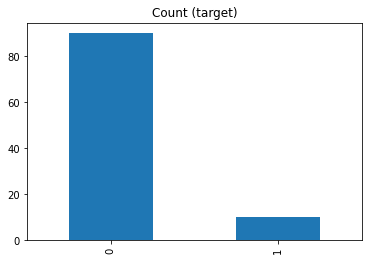

In [2]:
X, y = make_classification(n_classes=2, class_sep=1.5, weights=[.9, .1], 
                          n_informative=3, n_redundant=1, flip_y=0,
                          n_features=20, n_clusters_per_class=1,
                          n_samples=100, random_state=10)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

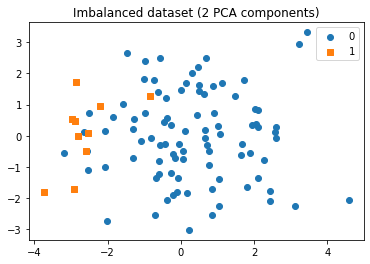

In [3]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')


# Random Undersampler

removed indices  [59 25 63 96 31  7 35 30 22  0  4  8  9 14 16 40 67 70 71 74]


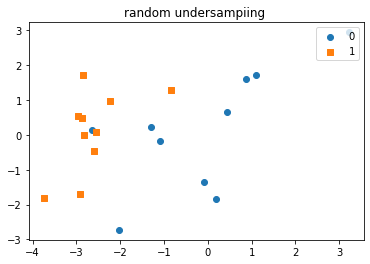

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

print("removed indices ", rus.sample_indices_)

plot_2d_space(X_rus, y_rus, "random undersampiing ")

removed indices  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99 67  9 70  9 40 74 14  4 40  8 74  4 74 71 14 74 14  4 74  9
 67 16  8 71 16 40 67 71 14 40 16 40  8  9 74  9 70 70 14 70 40 40 71  4
 16 71 67 14 14  8 16  8  8 71 74 70 67  9 67 16 40 70  8  4 40 14 71  4
 70 71 16 14  9  8 70 67  4 14 40  4]


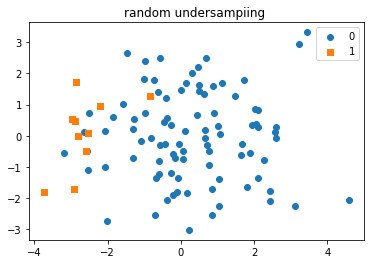

In [6]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler()
X_rus, y_rus = rus.fit_sample(X, y)

print("removed indices ", rus.sample_indices_)

plot_2d_space(X_rus, y_rus, "random undersampiing ")